In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('/Users/stephen/Desktop/project_dataset.csv')

In [3]:
define = {
    '89':1,
    '90':2,
    '91':3,
    '92':4,
    '93':5,
    '94':6,
    '95':7,
    '96':8,
    '97':9,
    '98':10,
    '99':11,
    '00':12,
    '01':13,
    '02':14,
    '03':15,
    '04':16,
    '05':17,
    '06':18,
    '07':19,
    '08':20,
    '09':21,
    '10':22,
    '11':23,
    '12':24,
    '13':25,
    '14':26,
    '15':27,
    '16':28,
    '17':29,
    '18':30,
    '19':31,
}
data['year_no'] = data['Years'].apply(lambda x:str(x)[2:4])
data['year_level'] = data['year_no'].map(define)
cols = ['year_level','Month Level','Production','Consumption','Previous Month Prices','Events']

In [4]:
x_train = data.loc[0:270,cols]
y_train = data.loc[0:270,'Prices']

x_test = data.loc[271:,cols]
y_test = data.loc[271:,'Prices']


(a)min_sample_leaf=2

99.52098220433535 99.85
96.70763624865522 105.41
102.1781519586551 104.23
101.85836306976623 107.07
102.1781519586551 112.69
109.81666985502355 117.79
111.49812348940662 113.67
110.61728031253992 104.09
102.65897352728255 90.73
95.53820278326728 96.75
97.50824670617156 105.27
102.97876241617143 106.28
102.1781519586551 103.41
101.6091105445137 101.17
101.3740851476883 101.19
101.3740851476883 105.1
102.1781519586551 107.64
102.60201562708542 102.52
102.17469560520463 98.85
97.50824670617156 99.37
97.50824670617156 99.74
97.50824670617156 105.26
102.97876241617143 108.16
103.88366312163882 108.76
109.81666985502355 105.43
102.1781519586551 102.63
101.3740851476883 105.48
102.1781519586551 102.1
101.3740851476883 104.83
102.1781519586551 104.04
102.65897352728255 104.87
102.97876241617143 105.71
102.97876241617143 108.37
108.99262871677493 105.23
102.97876241617143 100.05
97.50824670617156 95.85
96.70763624865522 86.08
89.6638047544384 76.99
76.31538776489514 60.7
61.11216222276371 47.11

Text(0,0.5,'Price')

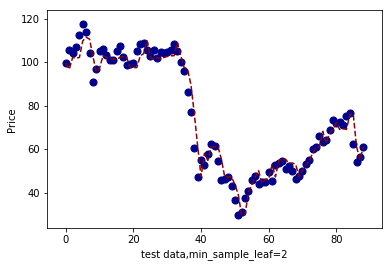

In [5]:
rf = RandomForestRegressor(max_depth=3,min_samples_leaf=2,random_state=0,n_estimators=90,criterion="mse")
rf.fit(x_train,y_train)

mse = []
y_pred = rf.predict(x_test)
for a,b in zip(y_pred,y_test):
    print(a,b)
    mse.append(np.square(y_pred-y_test))
    
print('>>> The model"s mse is %5f'%(np.mean(mse)))

rmse=np.sqrt(np.mean(mse))
print('>>> The model"s rmse is %5f'%(rmse))

from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print('>>> The model"s r2 is %5f'%(r2))

plt.figure()
plt.plot(np.arange(len(x_test)),y_pred,color = 'darkred',ls ='--')
plt.scatter(np.arange(len(x_test)),y_test,c = 'darkblue',s = 50)
plt.xlabel('test data,min_sample_leaf=2')
plt.ylabel('Price')    


(b)min_sample_leaf=8

103.0650941426698 99.85
100.82735145136508 105.41
105.7832319721243 104.23
105.7832319721243 107.07
106.02718954788187 112.69
106.02718954788187 117.79
106.84521318103883 113.67
106.84521318103883 104.09
106.60125560528127 90.73
100.922798717679 96.75
101.47339095753792 105.27
106.60125560528127 106.28
105.7832319721243 103.41
104.97180651517384 101.17
104.97180651517384 101.19
104.97180651517384 105.1
105.7832319721243 107.64
106.02718954788187 102.52
105.78983014833082 98.85
101.47339095753792 99.37
101.64537508452203 99.74
101.64537508452203 105.26
106.60125560528127 108.16
106.84521318103883 108.76
106.02718954788187 105.43
105.7832319721243 102.63
104.97180651517384 105.48
105.7832319721243 102.1
104.97180651517384 104.83
105.7832319721243 104.04
106.60125560528127 104.87
106.60125560528127 105.71
106.60125560528127 108.37
106.84521318103883 105.23
106.60125560528127 100.05
101.64537508452203 95.85
100.65536732438096 86.08
93.05962371985768 76.99
75.8355647719112 60.7
61.144239248

Text(0,0.5,'Price')

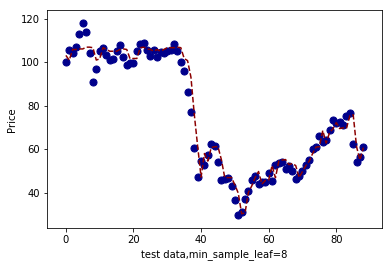

In [6]:
rf = RandomForestRegressor(max_depth=3,min_samples_leaf=8,random_state=0,n_estimators=90,criterion="mse")
rf.fit(x_train,y_train)

mse = []
y_pred = rf.predict(x_test)
for a,b in zip(y_pred,y_test):
    print(a,b)
    mse.append(np.square(y_pred-y_test))
    
print('>>> The model"s mse is %5f'%(np.mean(mse)))

rmse=np.sqrt(np.mean(mse))
print('>>> The model"s rmse is %5f'%(rmse))

from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print('>>> The model"s r2 is %5f'%(r2))

plt.figure()
plt.plot(np.arange(len(x_test)),y_pred,color = 'darkred',ls ='--')
plt.scatter(np.arange(len(x_test)),y_test,c = 'darkblue',s = 50)
plt.xlabel('test data,min_sample_leaf=8')
plt.ylabel('Price')    


(c)min_sample_leaf=15

101.02252842332469 99.85
101.02252842332469 105.41
101.02252842332469 104.23
101.02252842332469 107.07
101.02252842332469 112.69
101.02252842332469 117.79
101.02252842332469 113.67
101.02252842332469 104.09
101.02252842332469 90.73
101.02252842332469 96.75
101.02252842332469 105.27
101.02252842332469 106.28
101.02252842332469 103.41
101.02252842332469 101.17
101.02252842332469 101.19
101.02252842332469 105.1
101.02252842332469 107.64
101.02252842332469 102.52
101.02252842332469 98.85
101.02252842332469 99.37
101.02252842332469 99.74
101.02252842332469 105.26
101.02252842332469 108.16
101.02252842332469 108.76
101.02252842332469 105.43
101.02252842332469 102.63
101.02252842332469 105.48
101.02252842332469 102.1
101.02252842332469 104.83
101.02252842332469 104.04
101.02252842332469 104.87
101.02252842332469 105.71
101.02252842332469 108.37
101.02252842332469 105.23
101.02252842332469 100.05
101.02252842332469 95.85
101.02252842332469 86.08
99.12179183647196 76.99
78.10396097716453 60.7
6

Text(0,0.5,'Price')

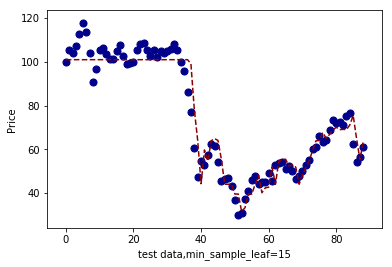

In [7]:
rf = RandomForestRegressor(max_depth=3,min_samples_leaf=15,random_state=0,n_estimators=90,criterion="mse")
rf.fit(x_train,y_train)

mse = []
y_pred = rf.predict(x_test)
for a,b in zip(y_pred,y_test):
    print(a,b)
    mse.append(np.square(y_pred-y_test))
    
print('>>> The model"s mse is %5f'%(np.mean(mse)))

rmse=np.sqrt(np.mean(mse))
print('>>> The model"s rmse is %5f'%(rmse))

from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print('>>> The model"s r2 is %5f'%(r2))

plt.figure()
plt.plot(np.arange(len(x_test)),y_pred,color = 'darkred',ls ='--')
plt.scatter(np.arange(len(x_test)),y_test,c = 'darkblue',s = 50)
plt.xlabel('test data,min_sample_leaf=15')
plt.ylabel('Price')    


(d)min_sample_leaf=20

94.50545186820426 99.85
94.50545186820426 105.41
94.50545186820426 104.23
94.50545186820426 107.07
94.50545186820426 112.69
94.50545186820426 117.79
94.50545186820426 113.67
94.50545186820426 104.09
94.50545186820426 90.73
94.50545186820426 96.75
94.50545186820426 105.27
94.50545186820426 106.28
94.50545186820426 103.41
94.50545186820426 101.17
94.50545186820426 101.19
94.50545186820426 105.1
94.50545186820426 107.64
94.50545186820426 102.52
94.50545186820426 98.85
94.50545186820426 99.37
94.50545186820426 99.74
94.50545186820426 105.26
94.50545186820426 108.16
94.50545186820426 108.76
94.50545186820426 105.43
94.50545186820426 102.63
94.50545186820426 105.48
94.50545186820426 102.1
94.50545186820426 104.83
94.50545186820426 104.04
94.50545186820426 104.87
94.50545186820426 105.71
94.50545186820426 108.37
94.50545186820426 105.23
94.50545186820426 100.05
94.50545186820426 95.85
94.50545186820426 86.08
94.50545186820426 76.99
92.31619407414368 60.7
66.20048010940262 47.11
42.85994607163

Text(0,0.5,'Price')

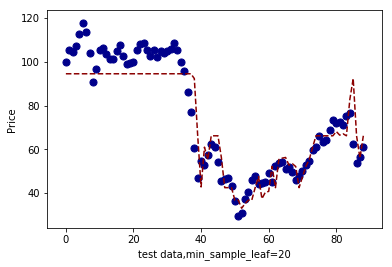

In [8]:
rf = RandomForestRegressor(max_depth=3,min_samples_leaf=20,random_state=0,n_estimators=90,criterion="mse")
rf.fit(x_train,y_train)

mse = []
y_pred = rf.predict(x_test)
for a,b in zip(y_pred,y_test):
    print(a,b)
    mse.append(np.square(y_pred-y_test))
    
print('>>> The model"s mse is %5f'%(np.mean(mse)))

rmse=np.sqrt(np.mean(mse))
print('>>> The model"s rmse is %5f'%(rmse))

from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print('>>> The model"s r2 is %5f'%(r2))

plt.figure()
plt.plot(np.arange(len(x_test)),y_pred,color = 'darkred',ls ='--')
plt.scatter(np.arange(len(x_test)),y_test,c = 'darkblue',s = 50)
plt.xlabel('test data,min_sample_leaf=20')
plt.ylabel('Price')    
